In [1]:
!pip install openpyxl
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import scipy.stats as stats

**Import the data**

In [3]:
data = pd.read_csv("measurements.csv")
print(data.head())
print(data.shape)

  distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN  
(388, 12)


**Data Cleaning**

In [4]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [5]:
data["specials"].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [6]:
data.drop(["specials","refill liters","refill gas"],axis=1, inplace=True)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,SP98,0,0,0
384,"16,1","4,3",38,25,31,SP98,1,0,0
385,16,"3,8",45,25,19,SP98,0,0,0
386,"15,4","4,6",42,25,31,SP98,1,0,0


In [7]:
data["distance"].unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [8]:
data["consume"].unique()

array(['5', '4,2', '5,5', '3,9', '4,5', '6,4', '4,4', '5,3', '5,6', '4,6',
       '5,9', '5,1', '4,7', '4,9', '5,7', '4,1', '5,8', '4,8', '4,3',
       '5,2', '7,4', '6,5', '4', '3,3', '9,9', '6,1', '6,2', '7,9',
       '12,2', '5,4', '3,6', '6,9', '8,7', '6,3', '6', '10,8', '8,1',
       '7,1', '3,8', '9', '3,7', '11,5', '6,6'], dtype=object)

In [9]:
data["speed"].unique()

array([26, 30, 38, 36, 46, 50, 43, 40, 42, 59, 58, 24, 32, 39, 37, 62, 57,
       21, 28, 29, 35, 51, 23, 55, 44, 25, 63, 61, 82, 52, 18, 41, 20, 56,
       45, 22, 60, 33, 34, 71, 75, 66, 27, 49, 14, 80, 53, 47, 73, 69, 85,
       67, 54, 31, 48, 16, 88, 65, 90, 87], dtype=int64)

In [10]:
data["temp_inside"].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [11]:
data["temp_outside"].unique()

array([12, 13, 15, 14, 10, 11,  6,  4,  9,  0,  5,  3,  8,  1,  2,  7, -3,
       17, 18, -5, 16, 19, 21, 20, 25, 23, 27, 24, 26, 22, 30, 31, 28],
      dtype=int64)

In [12]:
data["gas_type"].unique()

array(['E10', 'SP98'], dtype=object)

In [13]:
data["AC"].unique()

array([0, 1], dtype=int64)

In [14]:
data["rain"].unique()

array([0, 1], dtype=int64)

In [15]:
data["sun"].unique()

array([0, 1], dtype=int64)

In [16]:
def convert_column_to_float_and_null(column):
    # Replace commas with dots and convert to float, replace 'NaN' with None
    converted_values = [
        float(value.replace(',', '.')) if isinstance(value, str) and ',' in value else (
                float(f"{value:.1f}") if isinstance(value, float) and value.is_integer() else float(value)
            )
        for value in column
    ]
    return converted_values

In [17]:
data["distance"]=convert_column_to_float_and_null(data["distance"])
data["distance"].unique()

array([ 28. ,  12. ,  11.2,  12.9,  18.5,   8.3,   7.8,  12.3,   4.9,
        11.9,  12.4,  11.8,  24.7,  17.3,  33.4,  25.9,  25.3,  14.2,
        17.9,  18.4,  18.3,  32.6,  19. ,  12.1,  20. ,   4.5,  11.7,
        10.2,   5.4,   2. ,  16. ,  27.3,  10.6,  11.6,  13.1,   6.1,
       153.5,   2.9,   2.1,   9.8,   6.8,  14. ,  13.9,   9.7,  24.8,
        34.8,   5.2,  10.5,  13.2,  13. ,  12.2,  12.5,  15.7,   6.4,
         5.3,  26.2,  18.8,  22.9, 162.7,  16.6,  15.9,   5.1,  22.4,
        31.1,  16.1,   4.2,  17.4,  23.5,   7. ,  20.1,  20.8,   1.7,
        35.9,  36.9,  16.8,   9.9,  36.6,  44.9,  21.6,  39.4,  26.6,
        53.2,  18.9,  43.5,  16.4,  21.1,  22.7,  44.4,  35.8,  40.6,
        14.1,  58.7,  16.2,  31.8,  51.6,  38.6,  81.2, 130.3,  67.2,
        43.7,  56.1,  39. ,  38.5,  28.2,  19.6,  22.2,  13.6,  12.6,
         8.7,   7.9,   2.4,  18.1,   1.3,  13.4,  12.8,  29. ,  31.4,
        27.1,  25.2,  14.3,  16.9,   9.2,  31.5,  24.9,  17. ,   7.4,
        25.7,  24.5,

In [18]:
data["consume"]=convert_column_to_float_and_null(data["consume"])
data["consume"].unique()

array([ 5. ,  4.2,  5.5,  3.9,  4.5,  6.4,  4.4,  5.3,  5.6,  4.6,  5.9,
        5.1,  4.7,  4.9,  5.7,  4.1,  5.8,  4.8,  4.3,  5.2,  7.4,  6.5,
        4. ,  3.3,  9.9,  6.1,  6.2,  7.9, 12.2,  5.4,  3.6,  6.9,  8.7,
        6.3,  6. , 10.8,  8.1,  7.1,  3.8,  9. ,  3.7, 11.5,  6.6])

In [19]:
data["temp_inside"]=convert_column_to_float_and_null(data["temp_inside"])
data["temp_inside"].unique()

array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


In [21]:
mode = data.temp_inside.mode()
data.fillna(mode[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      388 non-null    float64
 1   consume       388 non-null    float64
 2   speed         388 non-null    int64  
 3   temp_inside   388 non-null    float64
 4   temp_outside  388 non-null    int64  
 5   gas_type      388 non-null    object 
 6   AC            388 non-null    int64  
 7   rain          388 non-null    int64  
 8   sun           388 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.4+ KB


- Deleted columns with lots of null values.
- Converted string values into float.
- Filled null values with mode.

**Adding Features**

In [22]:
data["temp_difference"] = data.temp_inside-data.temp_outside
data["fuel_used"] = data.distance * data.consume/100
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_difference,fuel_used
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325
...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084


- E10 price: 1.7880
- SP98 price: 1.8691

In [23]:
data["cost"] = data.apply(lambda x: round(x['fuel_used'] * 1.7880 if x['gas_type'] == "E10" else x['fuel_used'] * 1.8691,3), axis=1)
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_difference,fuel_used,cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,2.503
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.901
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,1.101
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.900
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.489
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0,6.5,0.5920,1.107
384,16.1,4.3,38,25.0,31,SP98,1,0,0,-6.0,0.6923,1.294
385,16.0,3.8,45,25.0,19,SP98,0,0,0,6.0,0.6080,1.136
386,15.4,4.6,42,25.0,31,SP98,1,0,0,-6.0,0.7084,1.324


In [24]:
data["speed_hours"] = round(data.speed/60,3)
data["average_speed"] = round(data.distance/data.speed/60,3)
data.drop("speed", axis=1, inplace = True)
data

,distance,consume,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_difference,fuel_used,cost,speed_hours,average_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.503,0.433,0.018
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.901,0.500,0.007
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,1.101,0.633,0.005
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.900,0.600,0.006
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.489,0.767,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0,6.5,0.5920,1.107,0.650,0.007
384,16.1,4.3,25.0,31,SP98,1,0,0,-6.0,0.6923,1.294,0.633,0.007
385,16.0,3.8,25.0,19,SP98,0,0,0,6.0,0.6080,1.136,0.750,0.006
386,15.4,4.6,25.0,31,SP98,1,0,0,-6.0,0.7084,1.324,0.700,0.006


In [25]:
data.describe()

,distance,consume,temp_inside,temp_outside,AC,rain,sun,temp_difference,fuel_used,cost,speed_hours,average_speed
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,21.916237,11.358247,0.077320,0.123711,0.082474,10.557990,0.935294,1.714420,0.698799,0.007446
std,22.667837,1.033172,0.997449,6.991542,0.267443,0.329677,0.275441,6.700099,1.115967,2.057053,0.226669,0.005187
min,1.300000,3.300000,19.000000,-5.000000,0.000000,0.000000,0.000000,-8.000000,0.120000,0.215000,0.233000,0.001000
25%,11.800000,4.300000,21.500000,7.000000,0.000000,0.000000,0.000000,6.375000,0.551650,1.008500,0.545750,0.005000
50%,14.600000,4.700000,22.000000,10.000000,0.000000,0.000000,0.000000,11.500000,0.680600,1.240000,0.675000,0.006000
75%,19.000000,5.300000,22.500000,16.000000,0.000000,0.000000,0.000000,14.625000,0.916500,1.679000,0.833000,0.009000
max,216.100000,12.200000,25.500000,31.000000,1.000000,1.000000,1.000000,26.000000,11.453300,21.407000,1.500000,0.044000


**Data Analysis**

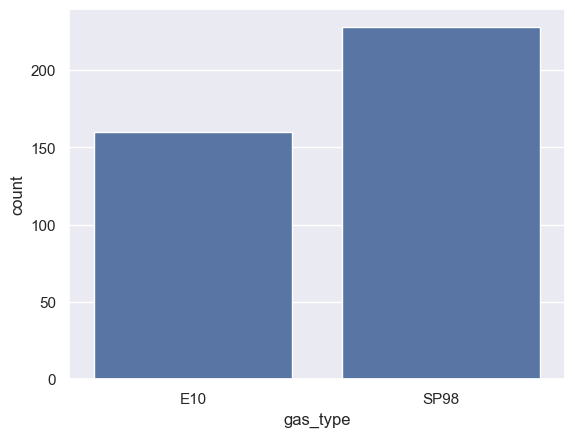

In [26]:
fig, ax = plt.subplots()
sns.countplot(x=data.gas_type)
plt.show()

In [27]:
data_num = data.select_dtypes(np.number)
data_cat = data.select_dtypes(object)

In [28]:
e10 = data[data["gas_type"]=="E10"]
sp98 = data[data["gas_type"]=="SP98"]

In [29]:
data.groupby("gas_type").agg({"distance":"mean"})

,distance
gas_type,
E10,21.096250
SP98,18.639912


In [30]:
data.groupby("gas_type").agg({"cost":"mean"})

,cost
gas_type,
E10,1.804006
SP98,1.651553


In [31]:
data.groupby("gas_type").agg({"average_speed":"mean"})

,average_speed
gas_type,
E10,0.007681
SP98,0.007281


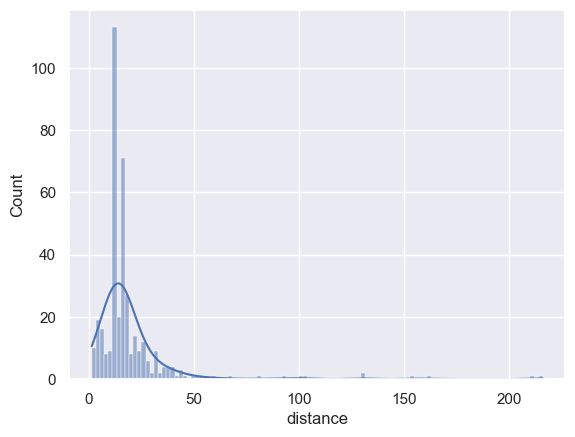

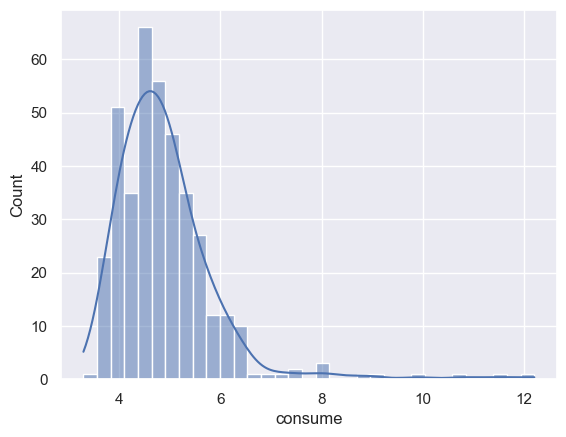

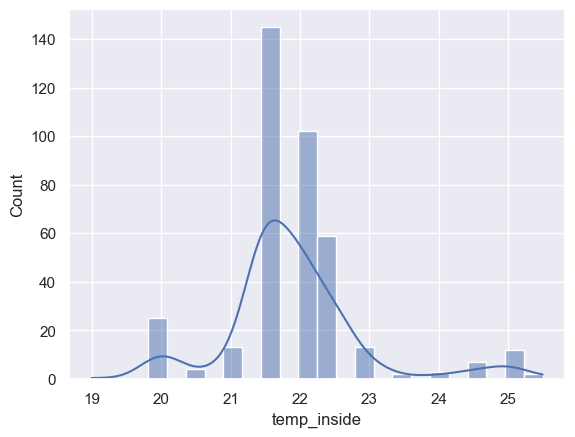

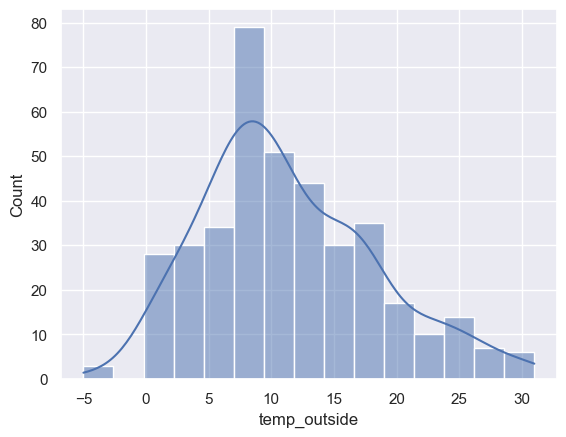

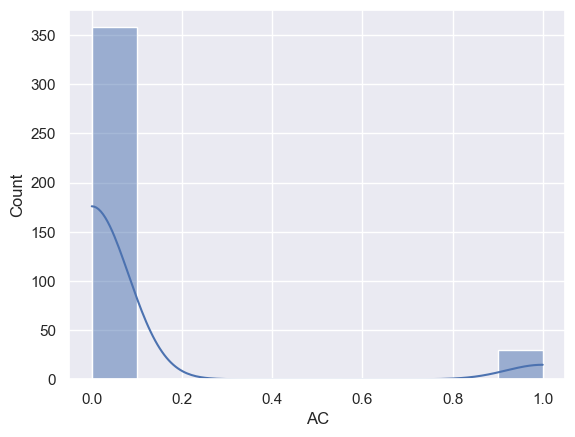

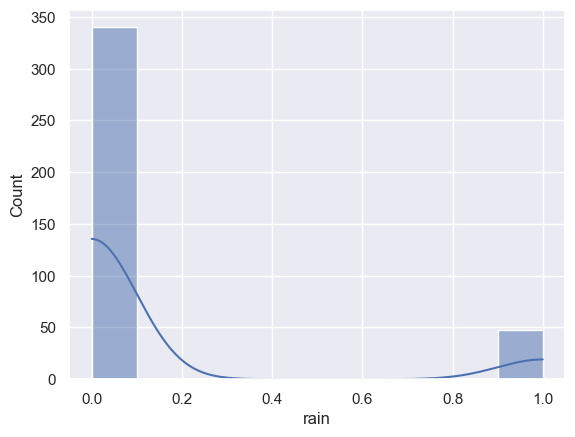

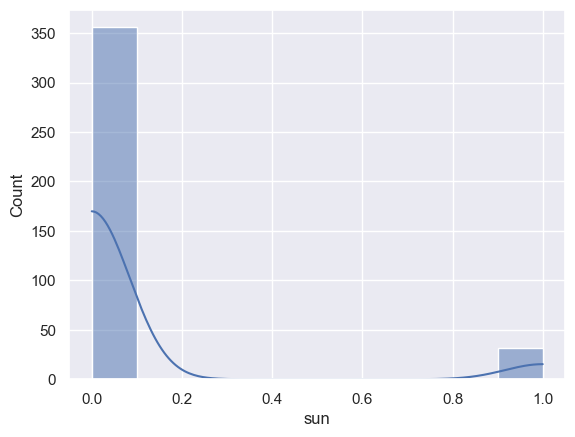

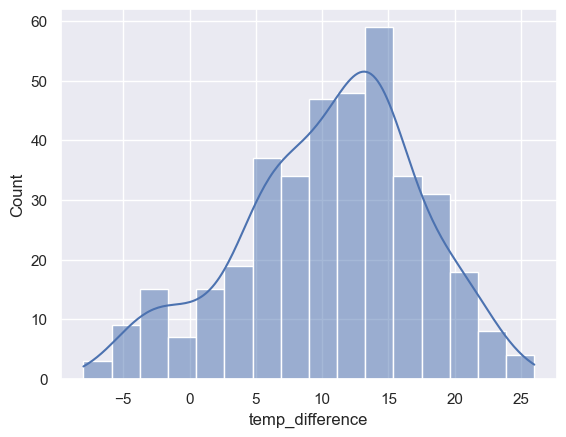

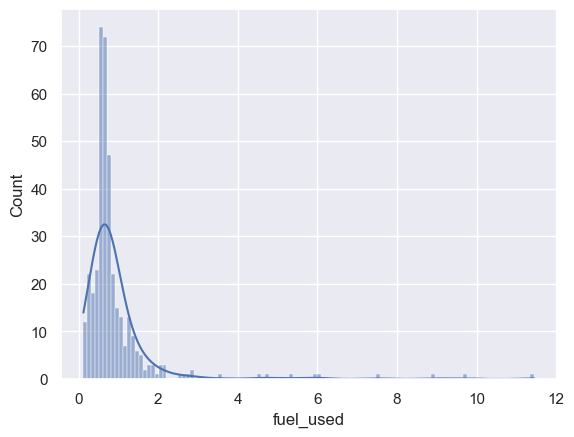

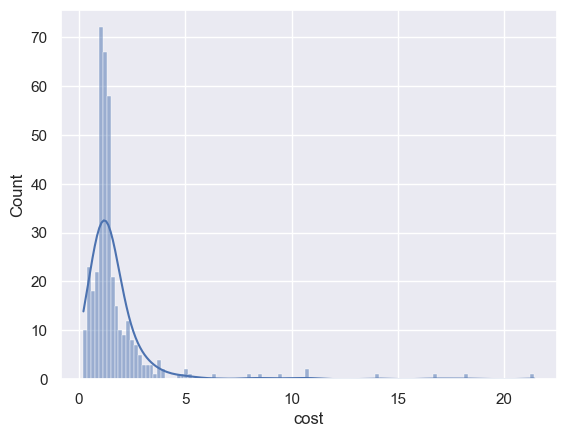

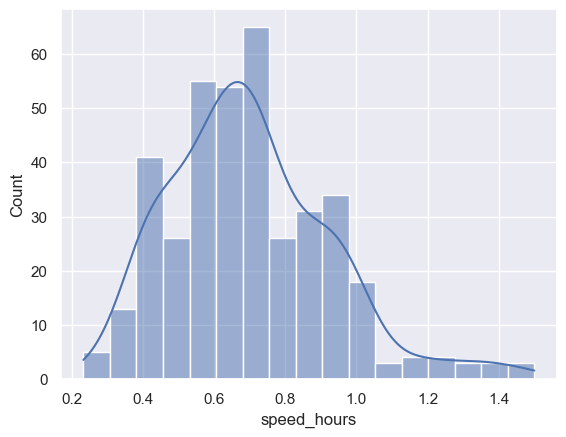

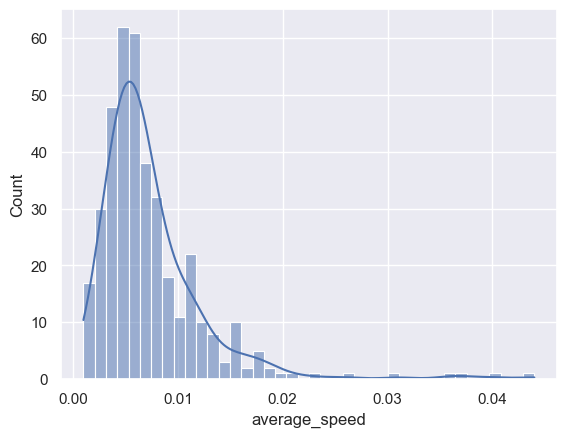

In [32]:
for i in data_num:
    sns.histplot(data=data_num, x=i, kde=True)
    plt.show()

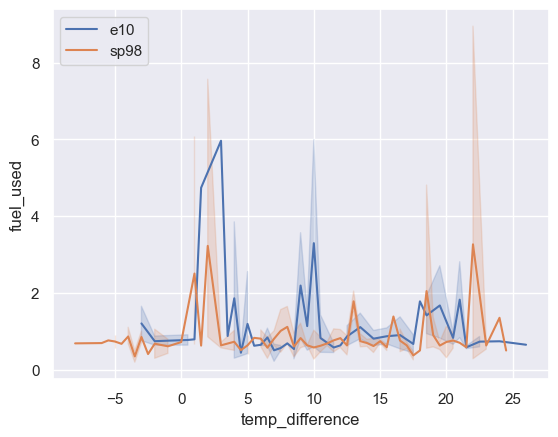

In [33]:
fig, ax = plt.subplots()

ax1 = sns.lineplot(data=e10, x=e10["temp_difference"], y=e10["fuel_used"], label="e10")
ax2 = sns.lineplot(data=sp98, x=sp98["temp_difference"], y=sp98["fuel_used"], label="sp98")

plt.legend(loc="upper left")
plt.show()

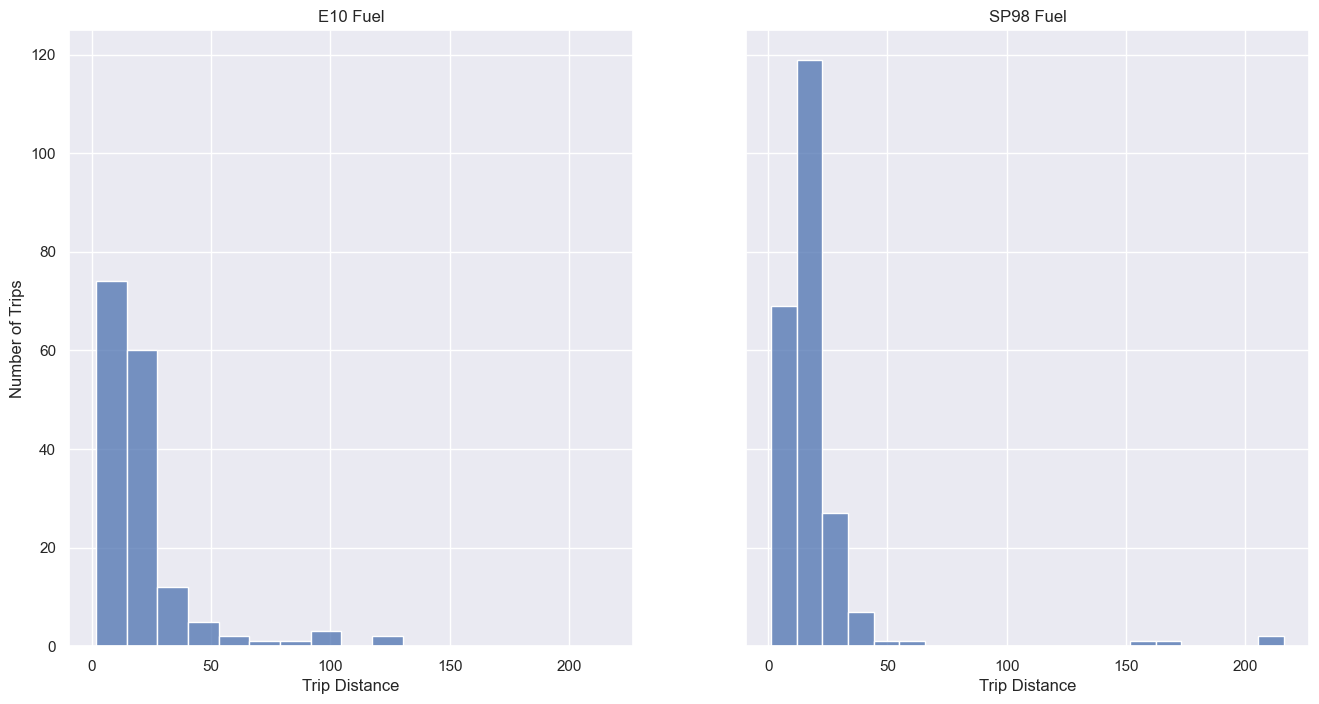

In [34]:
fig, axes = plt.subplots(1,2, figsize=(16,8),sharey=True,sharex=True)

sns.histplot(ax=axes[0],data=e10, x=e10["distance"], bins=10, label="E10").set(title="E10 Fuel")
axes[0].set(xlabel="Trip Distance", ylabel="Number of Trips")

sns.histplot(ax=axes[1],data=sp98, x=sp98["distance"], bins=20, label="SP98").set(title="SP98 Fuel")
axes[1].set(xlabel="Trip Distance", ylabel="Number of Trips")

plt.show()

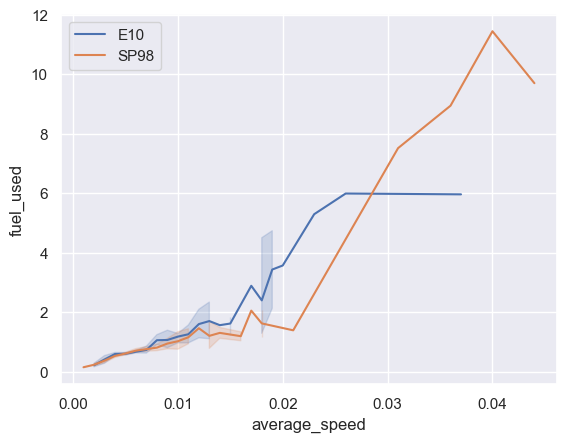

In [35]:
fig, axis = plt.subplots()

ax1=sns.lineplot(data=e10,x=e10["average_speed"],y=e10["fuel_used"],label="E10")
ax2=sns.lineplot(data=sp98,x=sp98["average_speed"],y=sp98["fuel_used"],label="SP98")

plt.show()

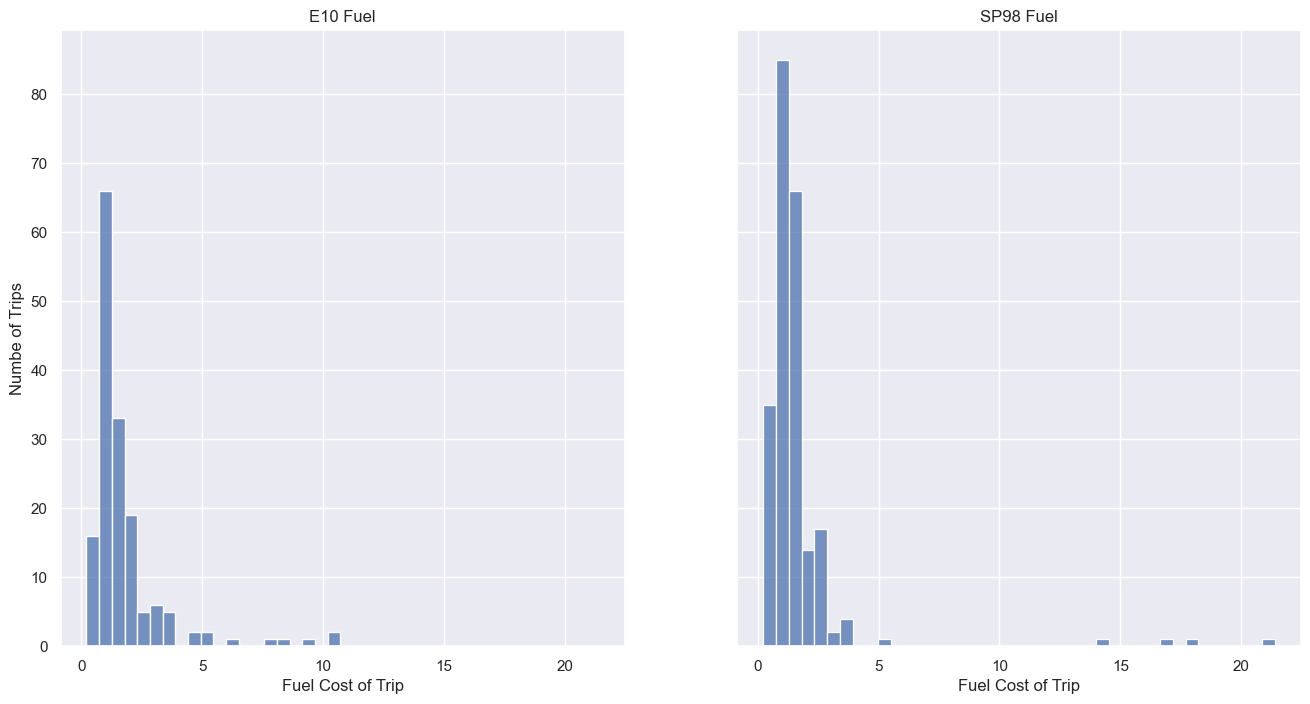

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,8),sharey=True,sharex=True)

sns.histplot(ax=axes[0],data=e10, x=e10["cost"],bins=20,label="E10").set(title="E10 Fuel")
axes[0].set(xlabel="Fuel Cost of Trip", ylabel="Numbe of Trips")

sns.histplot(ax=axes[1],data=sp98, x=sp98["cost"],bins=40,label="SP98").set(title="SP98 Fuel")
axes[1].set(xlabel="Fuel Cost of Trip", ylabel="Numbe of Trips")

plt.show()

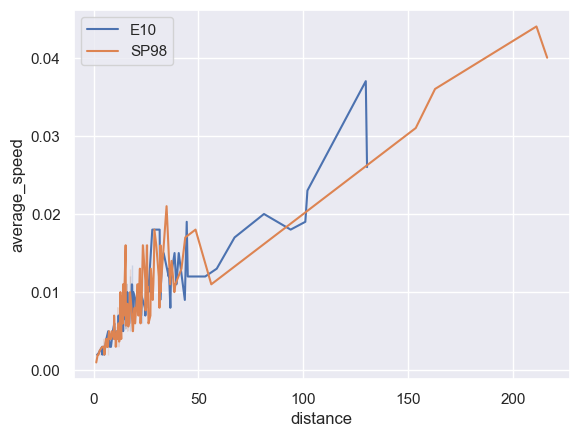

In [37]:
fig, axis = plt.subplots()

ax1=sns.lineplot(data=e10,x=e10["distance"],y=e10["average_speed"],label="E10")
ax2=sns.lineplot(data=sp98,x=sp98["distance"],y=sp98["average_speed"],label="SP98")

plt.show()

**EDA Conclusion**
<br>
- When the temperature difference between outside and inside is between 0-10 degrees, it is more effective to use SP98.
- At average speeds above 0.03, E10 tends to use fuel more efficiently (fuel consumption does not change as speed accelerates). However, there is not enough data for E10 over long distances, so new data should be collected and analyzed in more detail (since the average speed tends to increase over longer distances).
- Other than the above, there are no significant differences between the two.
- It is recommended that the above be kept in mind when considering optimization of vehicle allocation.

**Hypothesis Testing**

**1. Hypothesis - consumtion of the two fuels are the same**

In [38]:
# two-sided hypothesis test

# Performing the two-sided t-test
t_statistic, p_value = stats.ttest_ind(e10["fuel_used"], sp98["fuel_used"])

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.089091767035112
P-Value: 0.27679289437741406


**2. Hypothesis - cost per trip of the two fuels are same**

In [39]:
# two-sided hypothesis test

# Performing the two-sided t-test
t_statistic, p_value = stats.ttest_ind(e10["cost"], sp98["cost"])

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 0.7181777574817992
P-Value: 0.47308214368338797


**Hypothesis Conclusion**
- The two P-values are higher than the reference value (0.05), supporting the two hypotheses (1: no difference in fuel economy due to different fuel types, and 2: no difference in cost).
- However, more data accumulation and analysis may be needed to confirm whether these results are in line with reality.

**Prediction (Machine Learning)**

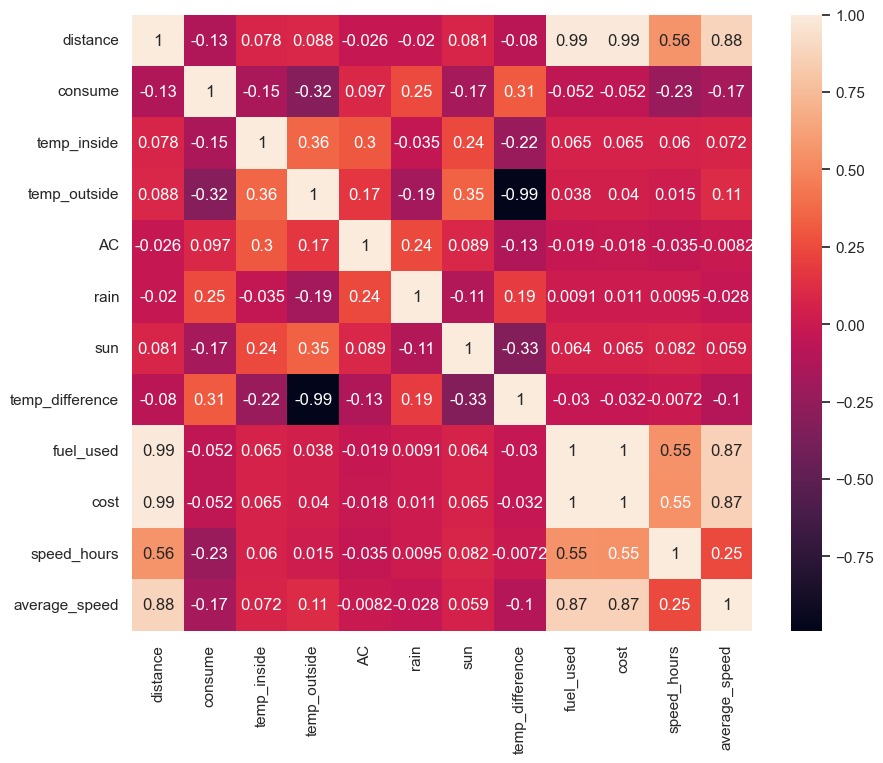

In [40]:
correlation = data_num.corr()

fig, ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlation, annot=True)
plt.show()

In [41]:
# Delete added columns due to multi-collinearity

drop_col = ["temp_difference","fuel_used","cost","speed_hours","average_speed"]
data=data.drop(drop_col,axis=1)
data

,distance,consume,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,21.5,12,E10,0,0,0
1,12.0,4.2,21.5,13,E10,0,0,0
2,11.2,5.5,21.5,15,E10,0,0,0
3,12.9,3.9,21.5,14,E10,0,0,0
4,18.5,4.5,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,24.5,18,SP98,0,0,0
384,16.1,4.3,25.0,31,SP98,1,0,0
385,16.0,3.8,25.0,19,SP98,0,0,0
386,15.4,4.6,25.0,31,SP98,1,0,0


In [42]:
# Split data into X and y (target to predict = consumption)

X = data.drop("consume", axis=1)
y = data["consume"]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [44]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [45]:
# Scale (normalize) numerical columns

from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)
X_train_norm = transformer.transform(X_train_num)
X_train_num_scale = pd.DataFrame(X_train_norm, index=X_train_num.index, columns=X_train_num.columns)
X_train_num_scale

,distance,temp_inside,temp_outside,AC,rain,sun
278,0.068436,0.461538,0.444444,0.0,0.0,0.0
345,0.068436,0.461538,0.555556,0.0,0.0,0.0
236,0.111266,0.538462,0.388889,0.0,0.0,0.0
232,0.120112,0.538462,0.361111,0.0,0.0,0.0
306,0.068436,0.461538,0.416667,0.0,0.0,0.0
...,...,...,...,...,...,...
203,0.052607,0.384615,0.611111,0.0,0.0,0.0
255,0.048883,0.538462,0.361111,0.0,0.0,0.0
72,0.058659,0.384615,0.305556,0.0,0.0,0.0
235,0.051676,0.538462,0.166667,0.0,0.0,0.0


In [46]:
X_test_norm = transformer.transform(X_test_num)
X_test_num_scale = pd.DataFrame(X_test_norm, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scale

,distance,temp_inside,temp_outside,AC,rain,sun
93,0.051676,0.384615,0.416667,0.0,0.0,0.0
179,0.069367,0.307692,0.138889,0.0,0.0,0.0
127,0.025605,0.769231,0.194444,0.0,0.0,0.0
62,0.039572,0.384615,0.305556,0.0,0.0,0.0
227,0.082402,0.538462,0.250000,0.0,1.0,0.0
...,...,...,...,...,...,...
78,0.051676,0.384615,0.333333,0.0,0.0,0.0
303,0.133147,0.461538,0.638889,1.0,0.0,0.0
162,0.241620,0.384615,0.194444,0.0,0.0,0.0
270,0.068436,0.461538,0.472222,0.0,0.0,0.0


In [47]:
# Encoding categorical column

X_train_cat["gas_type"] = np.where(X_train_cat["gas_type"]=="E10",1,0)
X_train_cat["gas_type"]

278    0
345    1
236    1
232    0
306    0
      ..
203    0
255    1
72     0
235    1
37     1
Name: gas_type, Length: 310, dtype: int32

In [48]:
X_test_cat["gas_type"] = np.where(X_test_cat["gas_type"]=="E10",1,0)
X_test_cat["gas_type"]

93     0
179    1
127    0
62     0
227    0
      ..
78     0
303    0
162    1
270    1
188    1
Name: gas_type, Length: 78, dtype: int32

In [49]:
X_train = pd.concat([X_train_num,X_train_cat],axis=1)
X_test = pd.concat([X_test_num,X_test_cat],axis=1)
print(X_train)
print(X_test)

     distance  temp_inside  temp_outside  AC  rain  sun  gas_type
278      16.0         22.0            11   0     0    0         0
345      16.0         22.0            15   0     0    0         1
236      25.2         22.5             9   0     0    0         1
232      27.1         22.5             8   0     0    0         0
306      16.0         22.0            10   0     0    0         0
..        ...          ...           ...  ..   ...  ...       ...
203      12.6         21.5            17   0     0    0         0
255      11.8         22.5             8   0     0    0         1
72       13.9         21.5             6   0     0    0         0
235      12.4         22.5             1   0     0    0         1
37        4.9         21.5             6   0     0    0         1

[310 rows x 7 columns]
     distance  temp_inside  temp_outside  AC  rain  sun  gas_type
93       12.4         21.5            10   0     0    0         0
179      16.2         21.0             0   0     0  

In [50]:
# Try several regression models

def model_automation(models,X_train,y_train):
    for model in models:
        model.fit(X_train,y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train,y_train)}, Test -> {model.score(X_test,y_test)}")

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models=[LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(), RandomForestRegressor()]
model_automation(models, X_train, y_train)

LinearRegression: Train -> 0.16977397368645886, Test -> 0.1067749291433514
KNeighborsRegressor: Train -> 0.6789541774301648, Test -> 0.1864776628289857
DecisionTreeRegressor: Train -> 0.9924962256726543, Test -> -0.06200618076800324
RandomForestRegressor: Train -> 0.9327891755200034, Test -> 0.28299068971437424


**Conclusion**
- The RandomForest model was found to be the best model, but it still overfits the training data, so the parameters need to be fine-tuned.